In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Python libraries
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
#import squarify

# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from yellowbrick.classifier import DiscriminationThreshold

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
conv1 = pd.read_csv('/content/drive/MyDrive/black box/csv/relu conv1 BC.csv')
conv2 = pd.read_csv('/content/drive/MyDrive/black box/csv/relu conv2 BC.csv')
df1 = conv1.iloc[:200,:]
df1['class'] = 0
df2 = conv2.iloc[:200,:]
df2['class'] = 1
frames = [df1, df2]
df = pd.concat(frames)

In [ ]:
  
df.head()

,class,Area,PA_ratio,Circularity,EquivDiameter,Extent,FilledArea,Major axis length,Minor axis length,Mean,Standard Deviation,Shannon_Entropy,Glcm_entropy,Skewness,kurtosis,SFM_Coarseness,SFM_Contrast,SFM_Periodicity,SFM_Roughness,FPS_RadialSum,FPS_AngularSum,NGTDM_Coarseness,NGTDM_Contrast,NGTDM_Busyness,NGTDM_Complexity,NGTDM_Strngth,GSM
0,0,1245.8965,0.0184,29.6843,39.8287,0.0019,139.9381,5.6299,3.2114,1.368,1.108,0.1677,3.2812,0.0043,-0.0272,11.445761,14.377886,0.650054,2.203708,14024.869348,3437.581352,18.290516,0.183096,4.479960e-06,71506.372708,9.650812e+05,55.0
1,0,1245.8965,0.0184,29.6843,39.8287,0.0073,0.7937,0.3915,0.1193,3.367,1.852,0.2015,3.7714,-0.0018,-0.0409,12.324518,10.955980,0.643125,2.209309,30985.030602,5780.817339,66.285351,0.452084,4.958265e-07,67227.104294,1.624154e+06,132.0
2,0,1245.8965,0.0184,29.6843,39.8287,0.0001,3.8100,7.4789,3.4042,1.646,0.825,0.1825,3.7378,0.0240,0.0527,7.936573,18.138268,0.658075,2.192688,14546.140446,4065.210831,23.383624,0.144916,2.729284e-06,122234.392385,7.566323e+05,58.0
3,0,1245.8965,0.0184,29.6843,39.8287,0.0079,0.7144,0.3217,0.1163,4.314,1.385,0.1964,3.8067,-0.0238,-0.0046,10.740130,12.217000,0.640197,2.217827,36805.195758,5148.325621,45.408873,0.301123,4.486520e-07,94567.031519,1.336343e+06,180.0
4,0,1245.8965,0.0184,29.6843,39.8287,0.0002,0.3175,1.6351,0.1072,4.329,1.034,0.1470,2.8637,-0.0688,0.1460,17.722376,12.220374,0.641390,2.222511,36435.513864,2228.465807,27.074811,0.101554,5.755877e-07,52666.336411,1.798998e+06,176.0


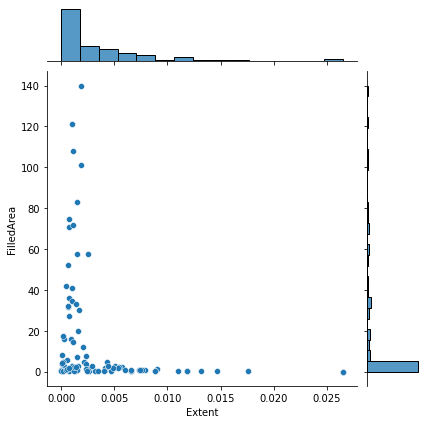

In [ ]:
sns.jointplot(x="Extent", y="FilledArea", data=df1);

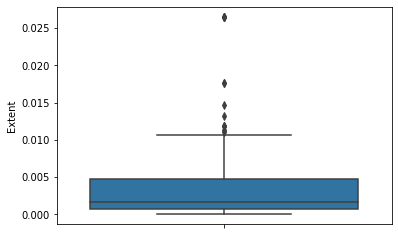

In [ ]:
sns.boxplot(y="Extent", data=df);

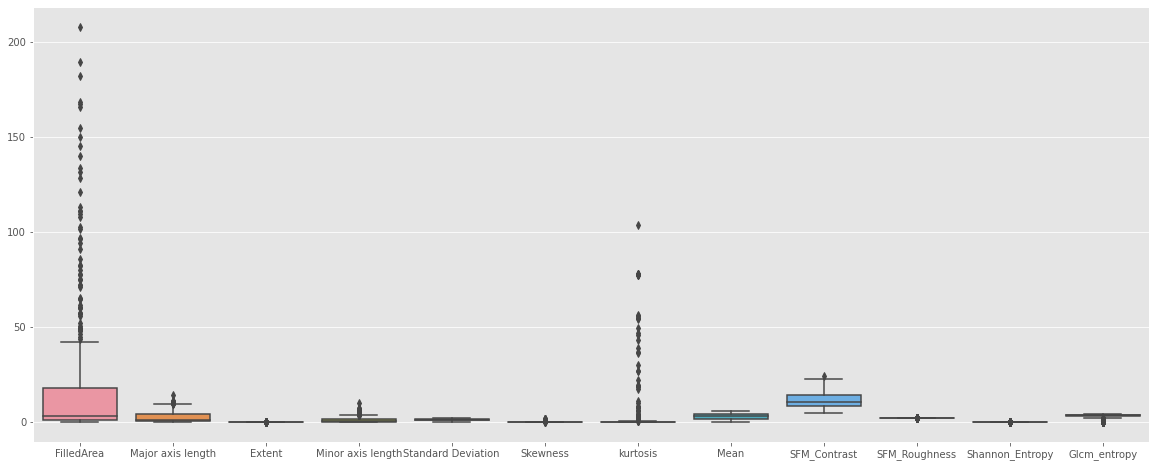

In [ ]:
pkmn = df[['FilledArea','Major axis length','Extent','Minor axis length','Standard Deviation','Skewness','kurtosis',
           'Mean','SFM_Contrast','SFM_Roughness','Shannon_Entropy','Glcm_entropy']]
pkmn2 = df[['class','FilledArea','Major axis length','Extent','Minor axis length','Standard Deviation','Skewness','kurtosis',
           'Mean','SFM_Contrast','SFM_Roughness','Shannon_Entropy','Glcm_entropy']]
#pkmn = conv1.drop(['class', 'Area','PA_ratio','Circularity','EquivDiameter','FilledArea','Extent','Skewness','kurtosis'],1)
plt.figure(figsize=(20,8))
sns.boxplot(data=pkmn);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


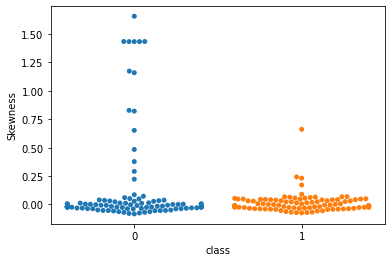

In [ ]:
sns.swarmplot(x='class', y='Skewness', data=df);

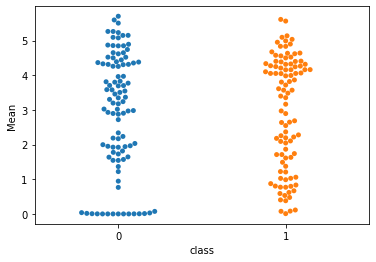

In [ ]:
sns.swarmplot(x='class', y='Mean', data=df);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3002: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.


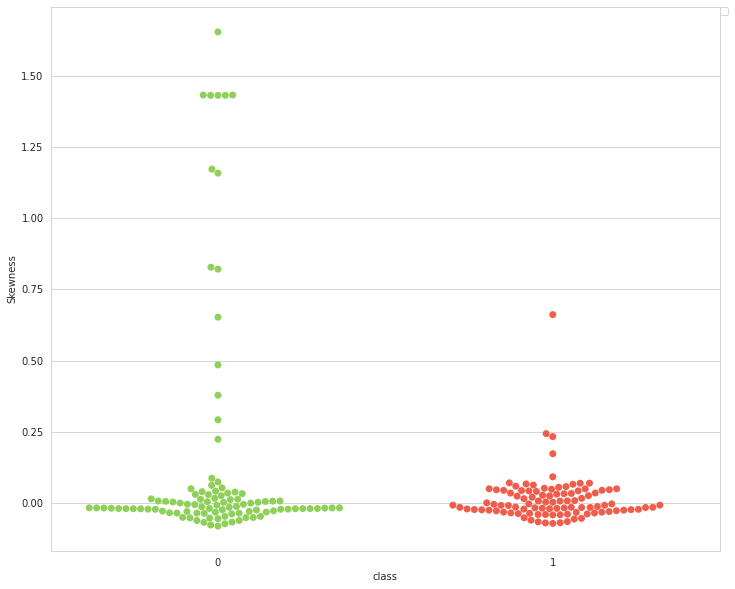

In [ ]:
sns.set_style("whitegrid")
with sns.color_palette([
    "#8ED752", "#F95643", "#53AFFE", "#C3D221", "#BBBDAF",
    "#AD5CA2", "#F8E64E", "#F0CA42", "#F9AEFE", "#A35449",
    "#FB61B4", "#CDBD72", "#7673DA", "#66EBFF", "#8B76FF",
    "#8E6856", "#C3C1D7", "#75A4F9"], n_colors=18, desat=.9):
    plt.figure(figsize=(12,10))
    #plt.ylim(0, 275)
    sns.swarmplot(x='class', y='Skewness', data=df, split=True, size=7)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

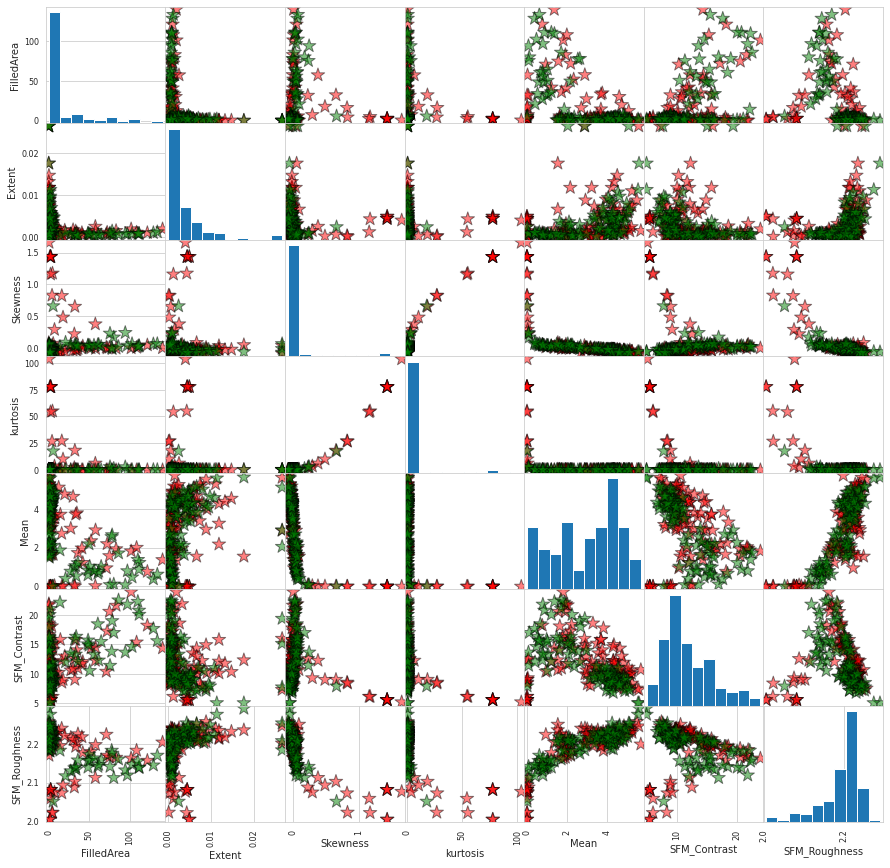

In [ ]:
color_list = ['red' if i== 0 else 'green' for i in pkmn.loc[:,'class']]
pd.plotting.scatter_matrix(pkmn.loc[:, pkmn.columns != 'class'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       marker = '*',
                                       edgecolor= "black")
plt.show()

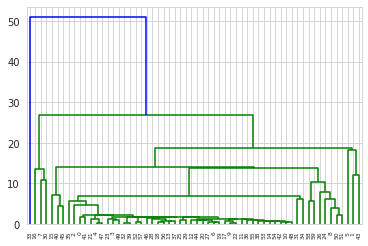

<Figure size 2160x576 with 0 Axes>

In [ ]:
from scipy.cluster.hierarchy import linkage,dendrogram

merg = linkage(pkmn.iloc[20:80,:],method = 'single')
dendrogram(merg, leaf_rotation = 90, leaf_font_size = 6)
plt.figure(figsize=(30,8))
plt.show()

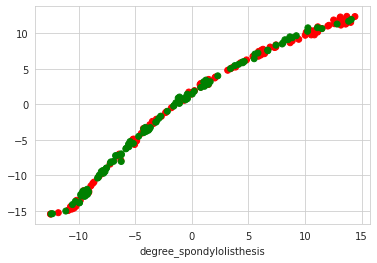

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(df)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list )
plt.xlabel('pelvic_radius')
plt.xlabel('degree_spondylolisthesis')
plt.show()

ValueError: ignored

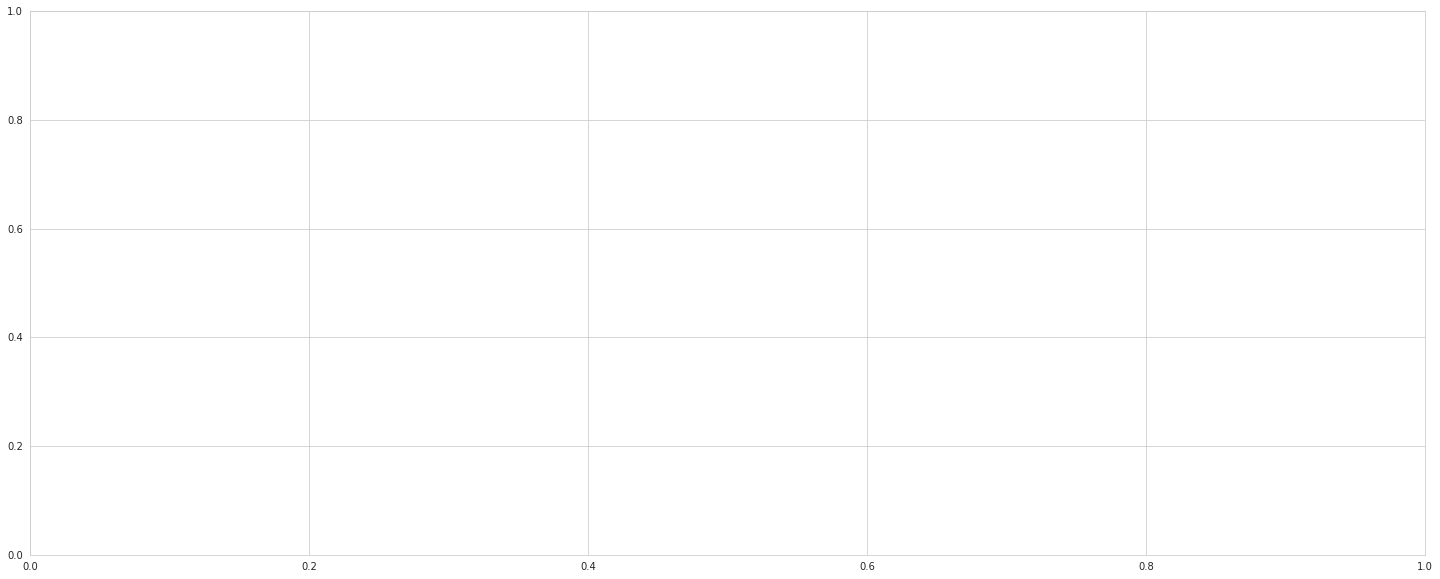

In [ ]:
#Gender show point plot
f,ax1=plt.subplots(figsize=(25,10))
sns.pointplot(x=np.arange(0,80),y=df[(df['class']==0)].Mean,color='lime',alpha=0.5)
sns.pointplot(x=np.arange(0,80),y=df[(df['class']==1)].Extent,color='red',alpha=0.5)
#sns.pointplot(x=np.arange(1,191),y=data[(data['Race/Ethnicity']=='group B')].Math_Score,color='lime',alpha=0.8)
plt.xlabel('Group B index State')
plt.ylabel('Frequency')
plt.title('Group B Math Score & Reading_Score')
plt.xticks(rotation=90)
plt.grid()
plt.show()

<Figure size 720x720 with 0 Axes>

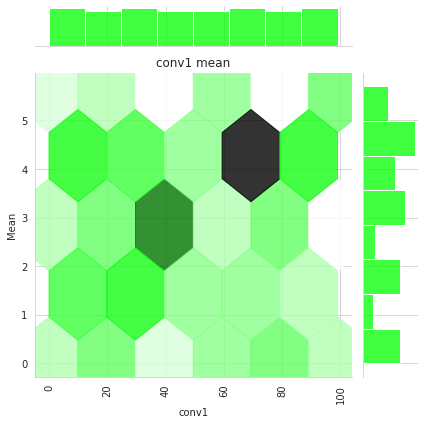

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(0,100),y=df[(df['class']==0)].Mean,color='lime',kind='hex',alpha=0.8)
plt.xlabel('conv1')
plt.ylabel('Mean')
plt.title('conv1 mean')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

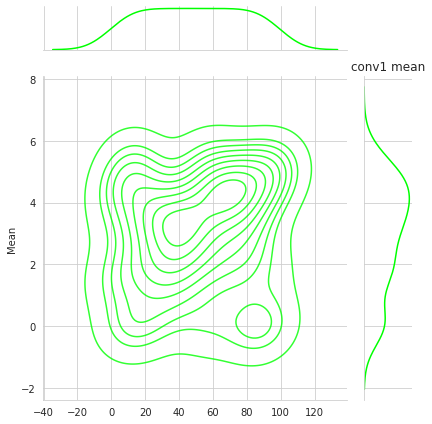

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(x=np.arange(0,100),y=df[(df['class']==0)].Mean,color='lime',space=0,kind='kde',alpha=0.8)
plt.xlabel('conv1')
plt.ylabel('Mean')
plt.title('conv1 mean')
plt.xticks(rotation=90)
plt.tight_layout()

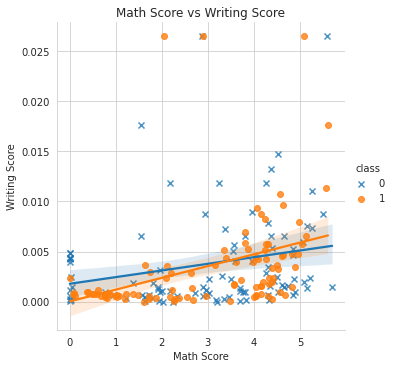

In [ ]:
sns.lmplot(x='Mean',y='Extent',hue='class',data=df,markers=['x','o'])
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

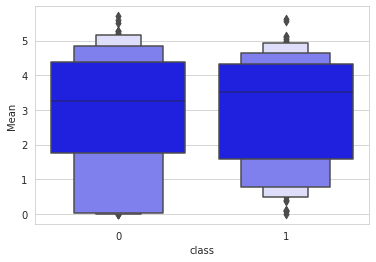

<Figure size 1440x576 with 0 Axes>

In [ ]:
sns.boxenplot(x="class", y="Mean",
              color="b",
              scale="linear", data=df)
plt.figure(figsize=(20,8))
plt.show()

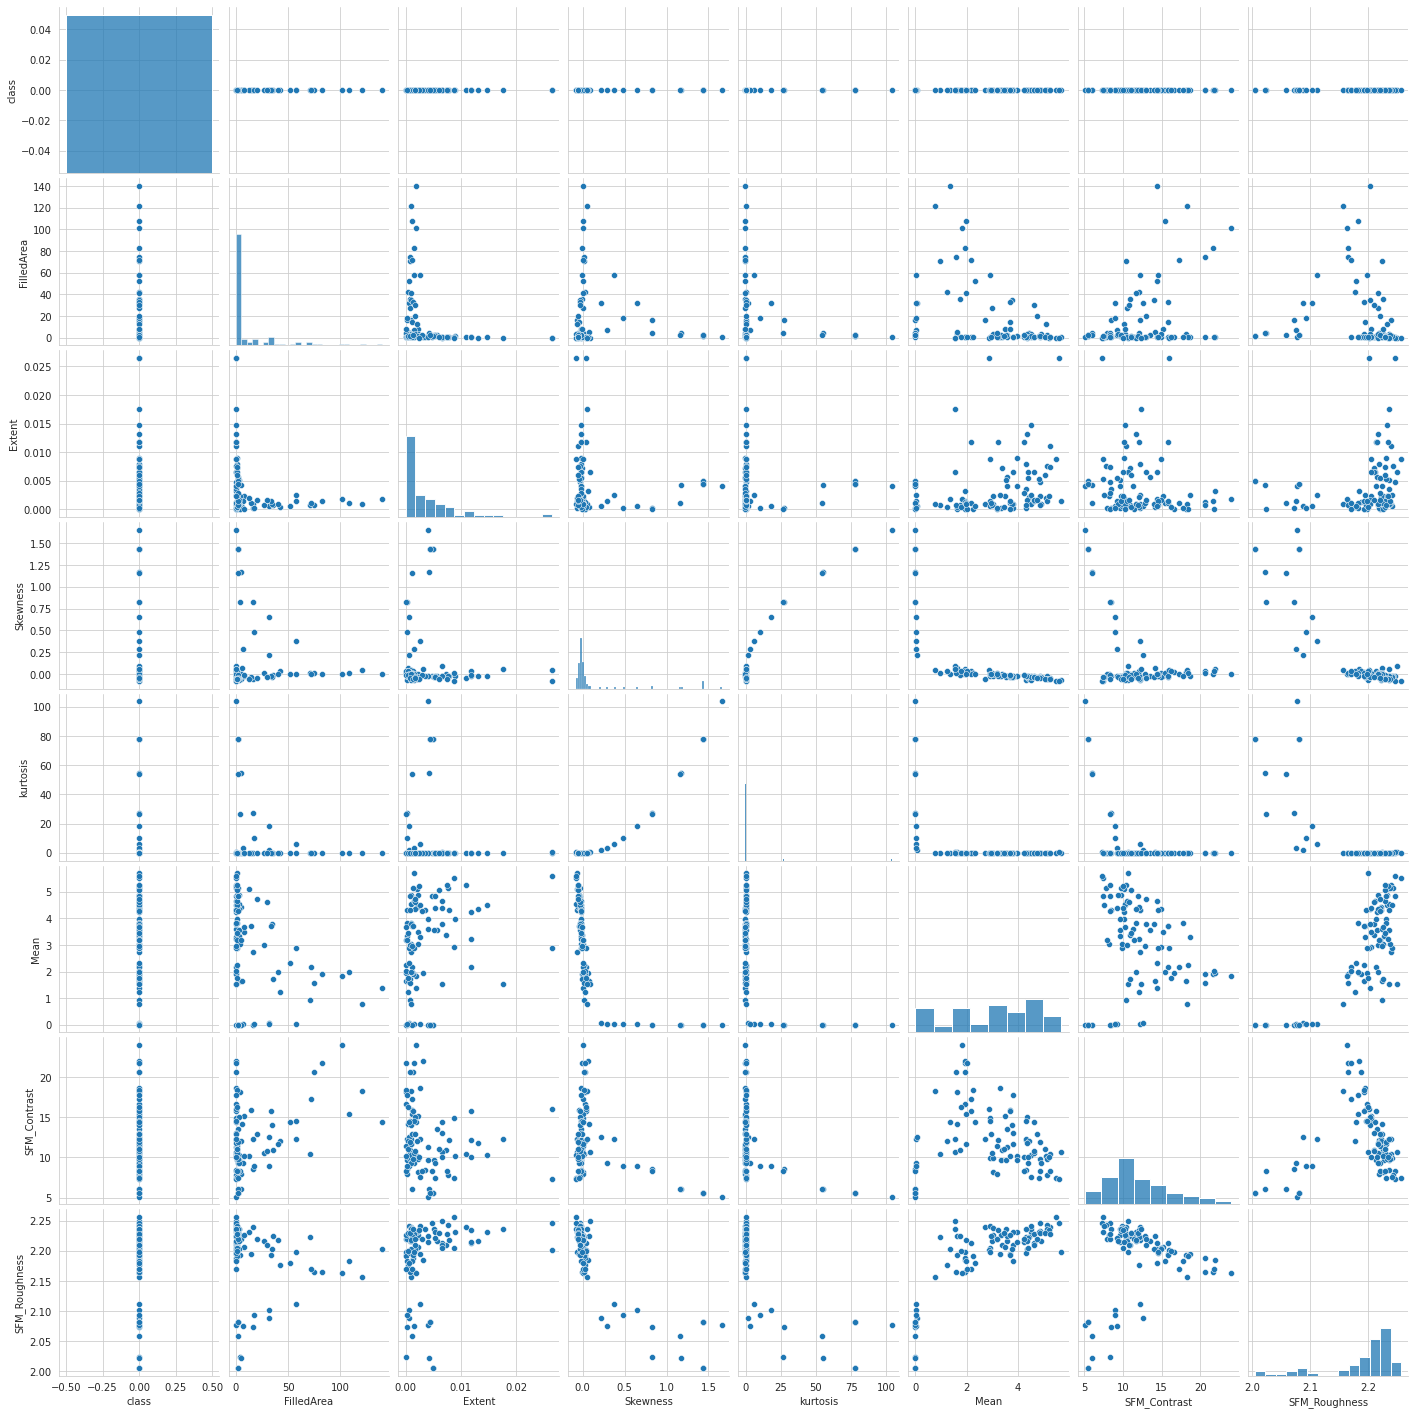

In [ ]:
sns.pairplot(df)
plt.show()

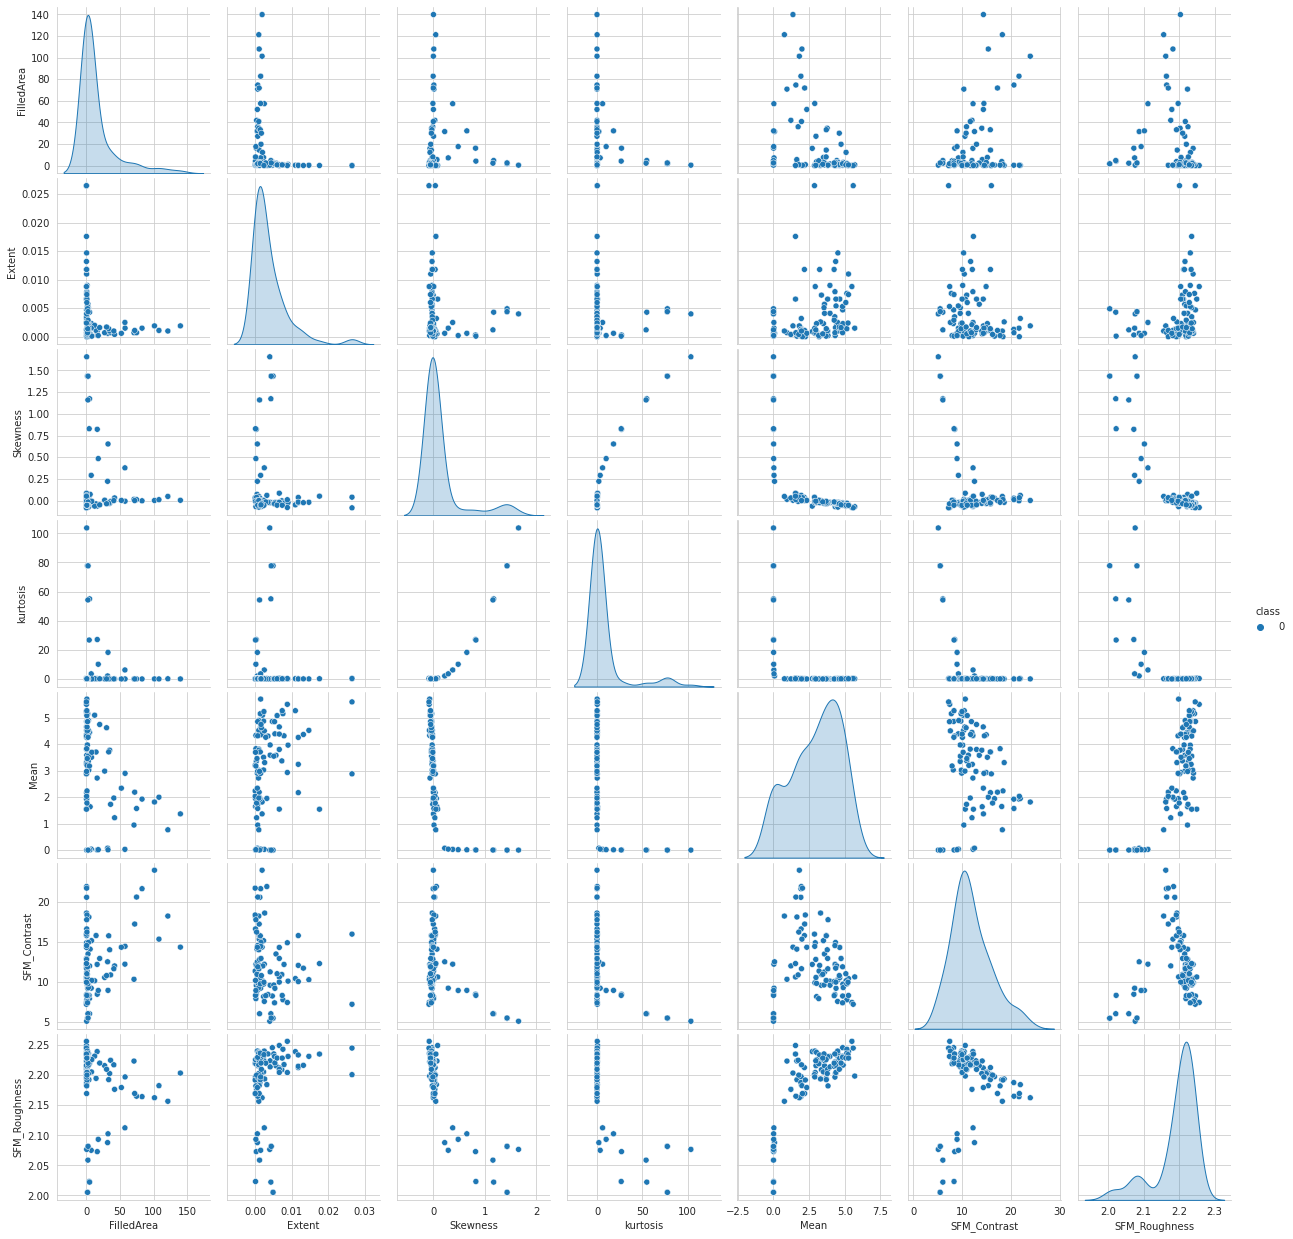

In [ ]:
df = pkmn[~pkmn.index.duplicated()]
sns.pairplot(df, hue="class")
plt.show()

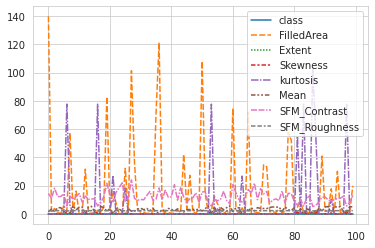

<Figure size 1080x576 with 0 Axes>

In [ ]:
sns.lineplot(data=df,color='coral')
plt.figure(figsize=(15,8))
plt.show()

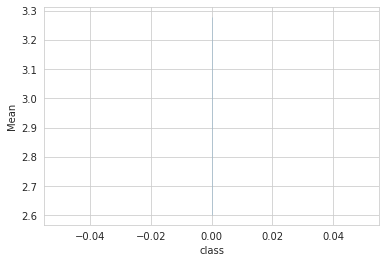

In [ ]:
sns.lineplot(x='class',y='Mean',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


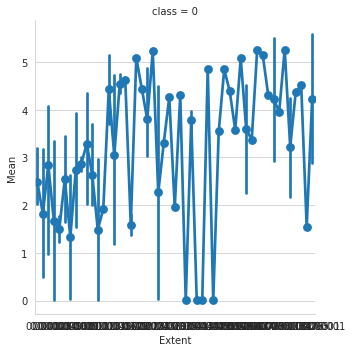

In [ ]:
g=sns.factorplot(x='Extent',y='Mean', hue="class",
                col="class", data=df)
plt.tight_layout()
plt.show()

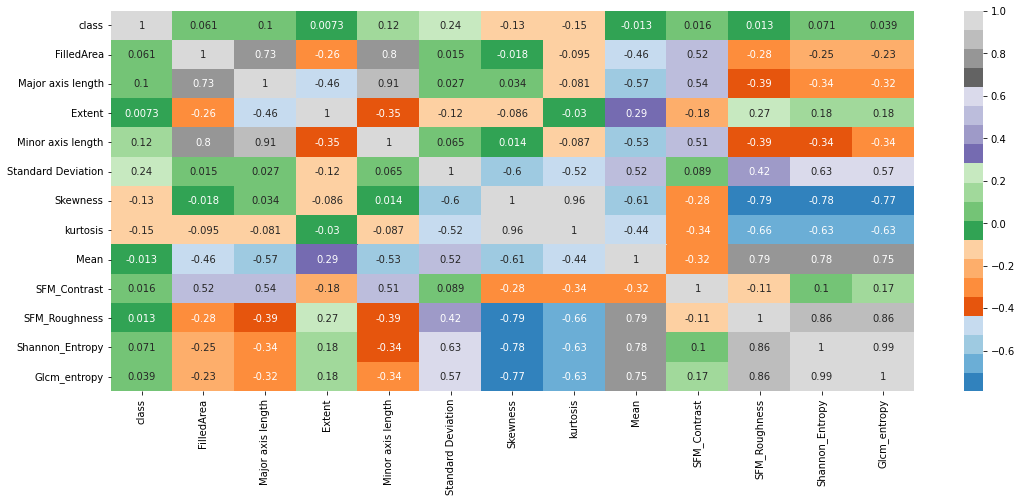

In [ ]:
plt.figure(figsize=(18,7))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(pkmn2.corr(), annot=True,cmap ='tab20c')  # seaborn has very simple solution for heatmap

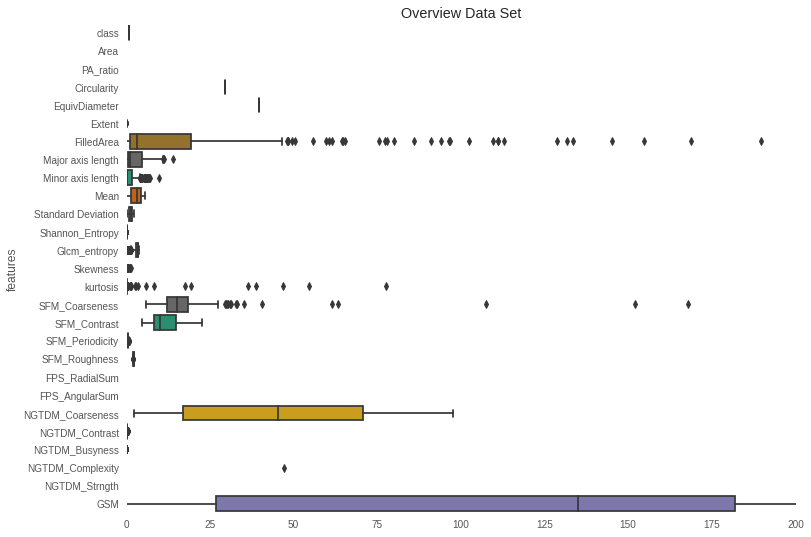

In [ ]:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(12, 9))

ax.set_facecolor('#FFFFFF')
ax.set(xlim=(-.05, 200))
plt.ylabel('features')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df2, 
  orient = 'h', 
  palette = 'Dark2')

In [ ]:
def plot_distribution(data_select, size_bin) :  
    # 2 datasets
    tmp1 = df1[data_select]
    tmp2 = df2[data_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['diabetic', 'healthy']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_select)

    py.iplot(fig, filename = 'Density plot')


In [ ]:
plot_distribution('Extent', 0)

In [ ]:

#augmentation for Gram Antracnose

import os
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2 
from scipy import fftpack
from PIL import Image,ImageEnhance
import scipy.fftpack
from skimage import data, io
from scipy.signal import convolve2d as conv2



folder1 = '/content/drive/MyDrive/Augmentation/original/skin cancer/Skin Cancer Dataset/train/benign'

dirr1 = '/content/drive/MyDrive/Augmentation/aug/skin cancer/geometric/validation/benign'

dirr2 = '/content/drive/MyDrive/Augmentation/aug/skin cancer/geometric/training/benign'

j=0

for im in os.listdir(folder1):
    #read image
    path = os.path.join(folder1,im)
    img = cv2.imread(path)
    cv2.imwrite(os.path.join(dirr1,'raw '+str(j)+'.png'),img)
    #imgg = Image.open(path)

    #augmentation
    f2= cv2.flip(img,-1)
    cv2.imwrite(os.path.join(dirr2,'flip2 '+str(j)+'.png'),f2)
    f3= cv2.flip(img,1)

    cv2.imwrite(os.path.join(dirr2,'flip3 '+str(j)+'.png'),f3)

    f4 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2.imwrite(os.path.join(dirr2,'rotate '+str(j)+'.png'),f4)

    f5 = img[30:194,30:194]
    cv2.imwrite(os.path.join(dirr2,'zoom '+str(j)+'.png'),f5)

    j=j+1


print(j)
      

1440


In [ ]:


#augmentation for Gram Antracnose

import os
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2 
from scipy import fftpack
from PIL import Image,ImageEnhance
import scipy.fftpack
from skimage import data, io
from scipy.signal import convolve2d as conv2



folder1 = '/content/drive/MyDrive/Augmentation/original/breast mammogram/original/MalignantCalc'

dirr1 = '/content/drive/MyDrive/Augmentation/aug/breast_mammogram_aug/geometric/validation/MC'

dirr2 = '/content/drive/MyDrive/Augmentation/aug/breast_mammogram_aug/geometric/training/MC'

j=0

for im in os.listdir(folder1):
    #read image
    path = os.path.join(folder1,im)
    img = cv2.imread(path)
    cv2.imwrite(os.path.join(dirr1,'raw '+str(j)+'.png'),img)
    imgg = Image.open(path)



   
    #augmentation
    f2= cv2.flip(img,-1)
    cv2.imwrite(os.path.join(dirr2,'flip2 '+str(j)+'.png'),f2)
    f3= cv2.flip(img,1)

    cv2.imwrite(os.path.join(dirr2,'flip3 '+str(j)+'.png'),f3)

    f4 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2.imwrite(os.path.join(dirr2,'rotate '+str(j)+'.png'),f4)

    f5 = img[30:194,30:194]
    cv2.imwrite(os.path.join(dirr2,'zoom '+str(j)+'.png'),f5)

    j=j+1

    #if j == 750:
        #break

In [ ]:
#augmentation for Gram Antracnose

import os
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2 
from scipy import fftpack
from PIL import Image,ImageEnhance
import scipy.fftpack
from skimage import data, io
from scipy.signal import convolve2d as conv2



#folder1 = '/content/drive/MyDrive/Augmentation/original/skin cancer/Skin Cancer Dataset/train/malignant'

#dirr1 = '/content/drive/MyDrive/Augmentation/aug/skin cancer/geometric/validation/malignant'

#dirr2 = '/content/drive/MyDrive/Augmentation/aug/skin cancer/geometric/training/malignant'

folder1 = '/content/drive/MyDrive/Augmentation/original/skin cancer/Skin Cancer Dataset/train/malignant'

dirr1 = '/content/drive/MyDrive/Augmentation/aug/skin cancer/combined/validation/malignant'

dirr2 = '/content/drive/MyDrive/Augmentation/aug/skin cancer/combined/training/malignant'

j=0

for im in os.listdir(folder1):
    #read image
    path = os.path.join(folder1,im)
    img = cv2.imread(path)
    cv2.imwrite(os.path.join(dirr1,'raw '+str(j)+'.png'),img)
    imgg = Image.open(path)



   
    #augmentation
    f2= cv2.flip(img,-1)
    cv2.imwrite(os.path.join(dirr2,'flip2 '+str(j)+'.png'),f2)
    f3= cv2.flip(img,1)

    cv2.imwrite(os.path.join(dirr2,'flip3 '+str(j)+'.png'),f3)

    f4 = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    cv2.imwrite(os.path.join(dirr2,'rotate '+str(j)+'.png'),f4)

    f5 = img[30:194,30:194]
    cv2.imwrite(os.path.join(dirr2,'zoom '+str(j)+'.png'),f5)

    #brightness
    enhancer = ImageEnhance.Brightness(imgg)
    factor = 0.5 #darkens the image
    im_output = enhancer.enhance(factor)
    im_output.save(os.path.join(dirr2,'br_low '+str(j)+'.png'))

    factor = 1.4 #brightens the image
    im_output = enhancer.enhance(factor)
    im_output.save(os.path.join(dirr2,'br_high '+str(j)+'.png'))
    

    #contrast
    enhancer2 = ImageEnhance.Contrast(imgg)
    factor = 0.5 #darkens the image
    im_output = enhancer2.enhance(factor)
    im_output.save(os.path.join(dirr2,'cntr_low '+str(j)+'.png'))

    factor = 1.4 #brightens the image
    im_output = enhancer2.enhance(factor)
    im_output.save(os.path.join(dirr2,'cntr_high '+str(j)+'.png'))

    j=j+1

    if j == 748:
        break

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Augmentation/aug/lung_hist_aug/geomatric/training',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Augmentation/aug/lung_hist_aug/geomatric/validation',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)


print("\n\n")
model.optimizer.get_config()

NameError: ignored